In [1]:
%matplotlib inline
import math
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import preprocessing
from dmba import classificationSummary
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from dmba import plotDecisionTree, regressionSummary, classificationSummary
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
DATA = Path('.').resolve().parent / 'data'

/home/gamer456148/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df  = pd.read_csv("/home/gamer456148/Downloads/UniversalBank.csv")
df = df.drop(columns=['ID', 'ZIP Code'])

In [3]:
print (df.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


In [4]:
intColumns = [c for c in df.columns if df[c].dtype == 'int']
intColumns.remove('Personal Loan')
df[intColumns] = df[intColumns].astype('float64')
# Coversion example from previous assignment

In [5]:
train_df, valid_df = train_test_split(df, test_size=0.4, random_state=1)
print('Training set:', train_df.shape, 'Validation set:', valid_df.shape)
# Split data example from previous assignment

Training set: (3000, 12) Validation set: (2000, 12)


In [6]:
outcome = 'Personal Loan'
predictors = list(df.columns)
predictors.remove(outcome)
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]

In [7]:
results = []
for k in range(1, 4):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })
results = pd.DataFrame(results)
results
# From previous assignment KNeighbors model example

,k,accuracy
0,1,0.9555
1,2,0.9475
2,3,0.9545


In [8]:
p11 = 49 / (477 + 49)
print('Count based probability P(Loan = 1|CC = 1, Online = 1) = ', p11)

Count based probability P(Loan = 1|CC = 1, Online = 1) =  0.09315589353612168


In [9]:
predictors = ['CreditCard', 'Online']
print(train_df['Personal Loan'].value_counts() / len(train_df))
print()
for predictor in predictors:
    df = train_df[['Personal Loan', predictor]]
    freqTable = df.pivot_table(index='Personal Loan', columns=predictor, aggfunc=len)
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
    print()

0    0.904333
1    0.095667
Name: Personal Loan, dtype: float64

CreditCard          0.0       1.0
Personal Loan                    
0              0.703649  0.296351
1              0.693380  0.306620

Online              0.0       1.0
Personal Loan                    
0              0.412459  0.587541
1              0.390244  0.609756



In [10]:
p1 = 0.095667 * 0.306620 * 0.609756
p2 = 0.904333 * 0.296351 * 0.587541
print('Naive Bayes probability P(Loan = 1|CC = 1, Online = 1) = ', p1 / (p1 + p2))

Naive Bayes probability P(Loan = 1|CC = 1, Online = 1) =  0.1020046248320646


In [11]:
# The above Naive/Bayes example  is from a previous assignment model on the same dataset

In [12]:
# Now to work on the classification trees

In [13]:
import pandas as pd
import numpy as np
from sklearn import datasets
FEATURE_NAMES = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard' ]

In [14]:
# https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084
# Had a bit of trouble w/ array size so will try again
bank_df = pd.read_csv(DATA / '/home/gamer456148/Downloads/UniversalBank.csv')
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard' ]
bank_df = bank_df[columns]
bank_df = pd.get_dummies(bank_df, drop_first=True)
X = bank_df.drop(columns='Personal Loan')
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (3000, 11) Validation set: (2000, 11)


In [15]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [16]:
conda install graphviz

Solving environment: done

## Package Plan ##

  environment location: /home/gamer456148/miniconda3

  added / updated specs:
    - graphviz


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> pkgs/main::ca-certificates-2021.1.19-h06a4308_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.12.5-py37h8~ --> pkgs/main::certifi-2020.12.5-py37h06a4308_0
  conda              conda-forge::conda-4.9.2-py37h89c1867~ --> pkgs/main::conda-4.9.2-py37h06a4308_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [17]:
conda install -c conda-forge pydotplus

Solving environment: done

## Package Plan ##

  environment location: /home/gamer456148/miniconda3

  added / updated specs:
    - pydotplus


The following packages will be UPDATED:

  certifi            pkgs/main::certifi-2020.12.5-py37h06a~ --> conda-forge::certifi-2020.12.5-py37h89c1867_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.1.19-~ --> conda-forge::ca-certificates-2020.12.5-ha878542_0
  conda               pkgs/main::conda-4.9.2-py37h06a4308_0 --> conda-forge::conda-4.9.2-py37h89c1867_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


Tree has 85 nodes


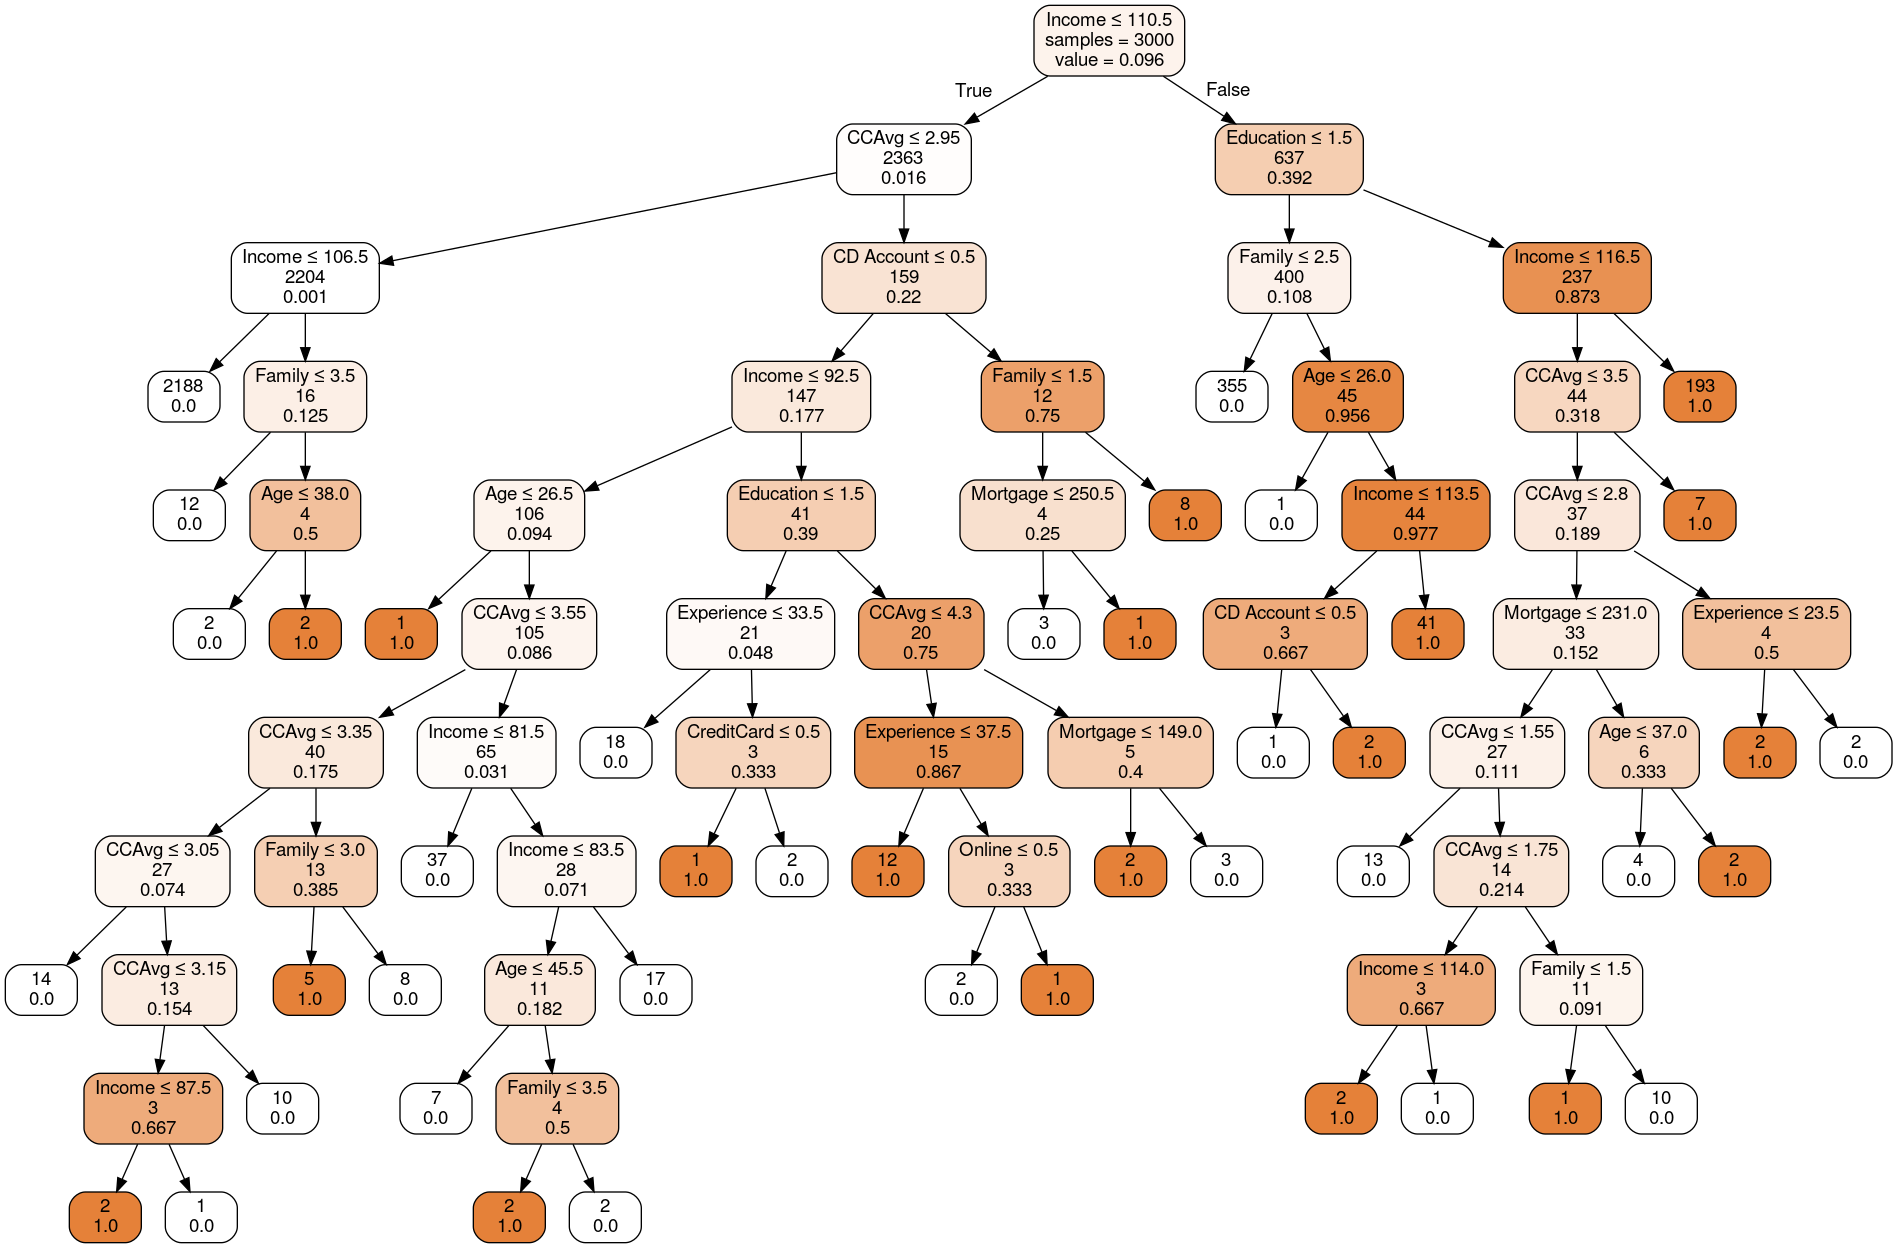

In [18]:
deepTree = DecisionTreeRegressor(random_state=1)
deepTree.fit(train_X, train_y)
print('Tree has {} nodes'.format(deepTree.tree_.node_count))
plotDecisionTree(deepTree, feature_names=train_X.columns, impurity=False)

In [19]:
deepClassTree = DecisionTreeClassifier(random_state=1)
deepClassTree.fit(train_X, train_y)
classificationSummary(train_y, deepClassTree.predict(train_X))
classificationSummary(valid_y, deepClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287
Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1790   17
     1   25  168


In [20]:
# The above is taken from the decision tree exercise

In [21]:
data = {'Prediction_1':  ['0.9555', '0.9475','0.9545'],
        'Prediction_2': ['0.904333', '0.703649','0.412459'],
        'Prediction_3': ['1.0000', '0.9790','0.2500'],
        }
df = pd.DataFrame (data, columns = ['Prediction_1','Prediction_2','Prediction_3'])
print (df)
# Source: https://datatofish.com/create-pandas-dataframe/

  Prediction_1 Prediction_2 Prediction_3
0       0.9555     0.904333       1.0000
1       0.9475     0.703649       0.9790
2       0.9545     0.412459       0.2500


In [22]:
import pandas as pd
data = pd.read_csv("/home/gamer456148/Downloads/UniversalBank.csv")
df = pd.DataFrame(data, columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education'])
print (df)

      Age  Experience  Income  Family  CCAvg  Education
0      25           1      49       4    1.6          1
1      45          19      34       3    1.5          1
2      39          15      11       1    1.0          1
3      35           9     100       1    2.7          2
4      35           8      45       4    1.0          2
...   ...         ...     ...     ...    ...        ...
4995   29           3      40       1    1.9          3
4996   30           4      15       4    0.4          1
4997   63          39      24       2    0.3          3
4998   65          40      49       3    0.5          2
4999   28           4      83       3    0.8          1

[5000 rows x 6 columns]


In [23]:
from dmba import classificationSummary
train_df, valid_df = train_test_split(df, test_size=0.4, random_state=1)

In [24]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000


In [25]:
data = {'Prediction_1':  ['0.9555', '0.9475','0.9545'],
        'Prediction_2': ['0.904333', '0.703649','0.412459'],
        'Prediction_3': ['1.0000', '0.9790','0.2500'],
        }
df = pd.DataFrame (data, columns = ['Prediction_1','Prediction_2','Prediction_3'])
df.describe()

,Prediction_1,Prediction_2,Prediction_3
count,3,3,3
unique,3,3,3
top,0.9545,0.703649,0.2500
freq,1,1,1


In [26]:
bank_df = pd.read_csv(DATA / '/home/gamer456148/Downloads/UniversalBank.csv')
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard' ]
bank_df = bank_df[columns]
bank_df = pd.get_dummies(bank_df, drop_first=True)
X = bank_df.drop(columns='Personal Loan')
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
bank_df.describe()
#tried using the classifier model for the majority vote pivot, unsure if it was a good idea. See my other two attempts.

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [27]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv("/home/gamer456148/Downloads/UniversalBank.csv")
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard' ]
array = df.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 5000
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/home/gamer456148/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
# tried running: https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [ ]:
df.describe()

In [ ]:
# Skimming over: https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9

In [ ]:
from sklearn.ensemble import BaggingClassifier
ds = DecisionTreeClassifier(criterion='entropy',max_depth=None)
bag = BaggingClassifier(max_samples=1.0,bootstrap=True)
bag.fit(X_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy')
booster = AdaBoostClassifier(base_estimator=tree)
booster = booster.fit(x, y)
# https://medium.com/fintechexplained/bagging-vs-boosting-in-machine-learning-8d7512d782e0
# Trying to look over just the basic bagging and boosted module samples in this tutorial

In [ ]:
# Looking over https://stats.stackexchange.com/questions/18891/bagging-boosting-and-stacking-in-machine-learning
# Wondering how to export CSV

In [ ]:
bank_df = pd.read_csv(DATA / '/home/gamer456148/Downloads/UniversalBank.csv')
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard' ]
bank_df = bank_df[columns]
bank_df = pd.get_dummies(bank_df, drop_first=True)
X = bank_df.drop(columns='Personal Loan')
y = bank_df['Personal Loan']
# We convert several of the columns to categorical data
for column in ('Family', 'Education'):
    bank_df[column] = bank_df[column].astype('category')
# The remaining columns (Age, Experience, Income, Mortgage and CCAvg) will be binned
bank_df['Age'] = pd.cut(bank_df['Age'], 5, labels=range(1, 6)).astype('category')
bank_df['Experience'] = pd.cut(bank_df['Experience'], 10, labels=range(1, 11)).astype('category')
bank_df['Income'] = pd.cut(bank_df['Income'], 5, labels=range(1, 6)).astype('category')
bank_df['CCAvg'] = pd.cut(bank_df['CCAvg'], 6, labels=range(1, 7)).astype('category')
bank_df['Mortgage'] = pd.cut(bank_df['Mortgage'], 10, labels=range(1, 11)).astype('category')
# Trying to run above code from assingment sample

In [ ]:
# Working on debugging

In [ ]:
print('Previous samples are above')